In [1]:
import requests
import pandas as pd
import numpy as np
from sklearn.cross_decomposition import CCA
from statsmodels.multivariate import cancorr
from statsmodels.multivariate.manova import MANOVA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import scipy.stats
# import pyrcca
# import scipy.stats.mstats as mstats

In [2]:
url = r'https://online.stat.psu.edu/onlinecourses/sites/stat505/files/data/sales.txt'
response = requests.get(url)
file = r'sales.txt'
with open(file, 'wb') as f:
    f.write(response.content)

In [3]:
column = ['Sales Growth','Sales Profitability','New Account Sales','Creativity','Mechanical Reasoning','Abstract Reasoning','Mathematics']          
with open(file,'rb') as f:
    data = f.read()
data = data.decode('UTF-8').split('\r\n')

In [4]:
temp = []
for jj in data:
    tempo = []
    for ii in jj.split(' '):
        if len(ii):
            ii = int(float(ii)) if int(float(ii)) == float(ii) else float(ii)
            tempo.append(ii)
    temp.append(tempo)

In [5]:
df = pd.DataFrame(temp,columns=column)
df = df.dropna()
df.head()

,Sales Growth,Sales Profitability,New Account Sales,Creativity,Mechanical Reasoning,Abstract Reasoning,Mathematics
0,93.0,96.0,97.8,9.0,12.0,9.0,20.0
1,88.8,91.8,96.8,7.0,10.0,10.0,15.0
2,95.0,100.3,99.0,8.0,12.0,9.0,26.0
3,101.3,103.8,106.8,13.0,14.0,12.0,29.0
4,102.0,107.8,103.0,10.0,15.0,12.0,32.0


In [6]:
df.tail()

,Sales Growth,Sales Profitability,New Account Sales,Creativity,Mechanical Reasoning,Abstract Reasoning,Mathematics
45,103.5,112.0,110.8,18.0,13.0,12.0,37.0
46,89.5,96.0,97.3,7.0,15.0,11.0,14.0
47,84.3,89.8,94.3,8.0,8.0,8.0,9.0
48,104.3,109.5,106.5,14.0,12.0,12.0,36.0
49,106.0,118.5,105.0,12.0,16.0,11.0,39.0


In [7]:
Xdf = df[df.columns[:3]]
Xdf.head()

,Sales Growth,Sales Profitability,New Account Sales
0,93.0,96.0,97.8
1,88.8,91.8,96.8
2,95.0,100.3,99.0
3,101.3,103.8,106.8
4,102.0,107.8,103.0


In [8]:
Ydf = df[df.columns[3:]]
Ydf.head()

,Creativity,Mechanical Reasoning,Abstract Reasoning,Mathematics
0,9.0,12.0,9.0,20.0
1,7.0,10.0,10.0,15.0
2,8.0,12.0,9.0,26.0
3,13.0,14.0,12.0,29.0
4,10.0,15.0,12.0,32.0


In [9]:
test=cancorr.CanCorr(Xdf.to_numpy(),Ydf.to_numpy())

In [10]:
test.x_cancoef

array([[-0.00996402,  0.02748447,  0.03522237],
       [-0.00439119, -0.02879634, -0.02027075],
       [-0.01279488,  0.07082332, -0.04003201],
       [-0.00897571, -0.00975944,  0.00161894]])

In [11]:
test.y_cancoef

array([[-0.00891113,  0.02486719, -0.05387899],
       [-0.00298938, -0.03459487,  0.01478786],
       [-0.01117974,  0.034042  ,  0.05477358]])

In [12]:
aa = MANOVA(Xdf.to_numpy(),Ydf.to_numpy())

In [13]:
aa.from_formula

<bound method Model.from_formula of <class 'statsmodels.multivariate.manova.MANOVA'>>

In [14]:
sc = StandardScaler(with_mean=True,with_std=True)
xData = sc.fit_transform(Xdf)
yData = sc.fit_transform(Ydf)

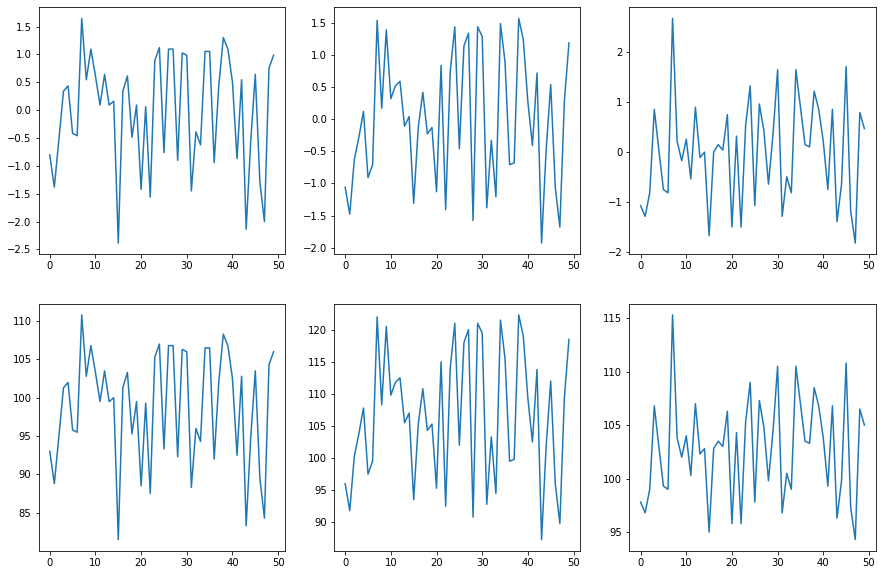

In [15]:
plt.figure(figsize=[15,10])
plt.subplot(2,3,1)
plt.plot(xData[:,0])
plt.subplot(2,3,2)
plt.plot(xData[:,1])
plt.subplot(2,3,3)
plt.plot(xData[:,2])
plt.subplot(2,3,4)
plt.plot(Xdf[Xdf.columns[0]])
plt.subplot(2,3,5)
plt.plot(Xdf[Xdf.columns[1]])
plt.subplot(2,3,6)
plt.plot(Xdf[Xdf.columns[2]])
plt.show()

In [16]:
model = CCA(n_components=3)
model.fit(xData,yData)

CCA(n_components=3)

In [17]:
U_c,V_c = model.transform(xData,yData)

In [18]:
result = np.corrcoef(U_c.T, V_c.T).diagonal(offset=3)

In [19]:
n_comp = 3
score = np.diag(np.corrcoef(model.x_scores_, model.y_scores_, rowvar=False)[:n_comp, n_comp:])

C:\Users\Ashu\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:449: FutureWarning: Attribute x_scores_ was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26). Use est.transform(X) on the training data instead.
  warnings.warn(
C:\Users\Ashu\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:461: FutureWarning: Attribute y_scores_ was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26). Use est.transform(X) on the training data instead.
  warnings.warn(


In [20]:
from scipy.stats import ttest_ind,ttest_rel

In [21]:
stat, p = ttest_ind(yData,xData[:,1])

In [22]:
stat, p = ttest_rel(yData[:,1].reshape(50,1),xData[:,1].reshape(50,1))

In [23]:
import statsmodels.api as sm

In [24]:
yData = sm.add_constant(yData)

In [25]:
model = sm.OLS(yData[:,1].reshape(50,1),xData[:,0].reshape(50,1))

results = model.fit()

In [26]:
results.params

array([0.5720363])

In [27]:
results.tvalues

array([4.88187744])